# Imports

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, minimize, root_scalar, minimize_scalar
from scipy.linalg import solve_discrete_lyapunov
from scipy.signal import correlate, hilbert
from sklearn.base import BaseEstimator
from scipy.special import factorial
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("default", category=RuntimeWarning)


In [2]:
from helpers import *
from EM_sk import EMEstimator

# Run

X dims : (2, 15000)
y dims : (15000,)
N : 15000
Fs : 1000
alpha : 0.999
F : 4
omega : 0.0251
sigma : 0.0001
mu : -4.5
beta : 1
R : [[ 0.9997 -0.0251]
 [ 0.0251  0.9997]]


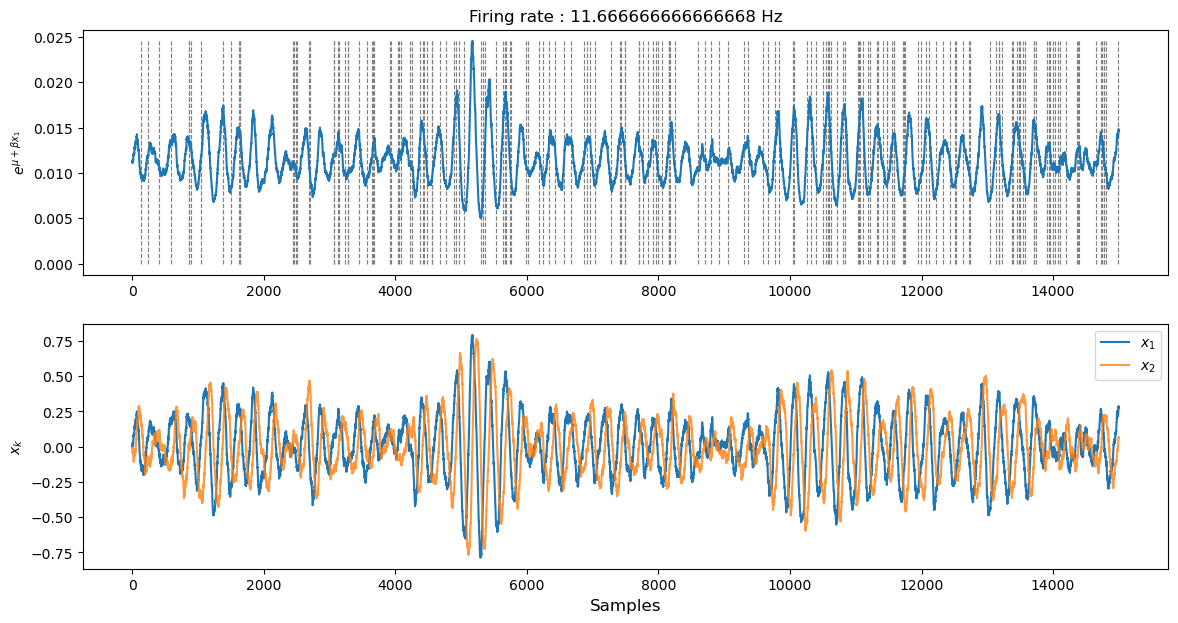

In [17]:
X, y, N, Fs, alpha, F, omega, R, sigma, mu, beta = get_params(N=15000, random = False, print_params=True, plot=True)

In [18]:
2*np.pi*F/Fs

0.025132741228718346

In [19]:
mu, beta, sigma, alpha, F


(-4.5, 1, 0.0001, 0.999, 4)

In [102]:
mu0 = np.log(y.sum()/N)
sigma0 = 0.00005
alpha0 = 0.99
F0 = 5
gamma = 50
x0 = X[:, 0]
print(mu0)

-4.451019506160833


In [103]:
X_dummy = np.ones_like(X)


In [104]:
model = EMEstimator(x0, mu0, alpha0, sigma0, F0, beta=beta, Fs=Fs, gamma = gamma, method='trust-krylov', max_iter=250)

In [105]:
model.get_params()

{'F0': 5,
 'Fs': 1000,
 'alpha0': 0.99,
 'am': None,
 'beta': 1,
 'bm': None,
 'gamma': 50,
 'max_iter': 250,
 'method': 'trust-krylov',
 'mu0': np.float64(-4.451019506160833),
 'omega0': 0.031415926535897934,
 'sigma0': 5e-05,
 'tol': 0.0001,
 'x0': array([ 0.00455888, -0.01097022])}

In [106]:
model.fit(X_dummy, y, log_file='params.csv')

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 

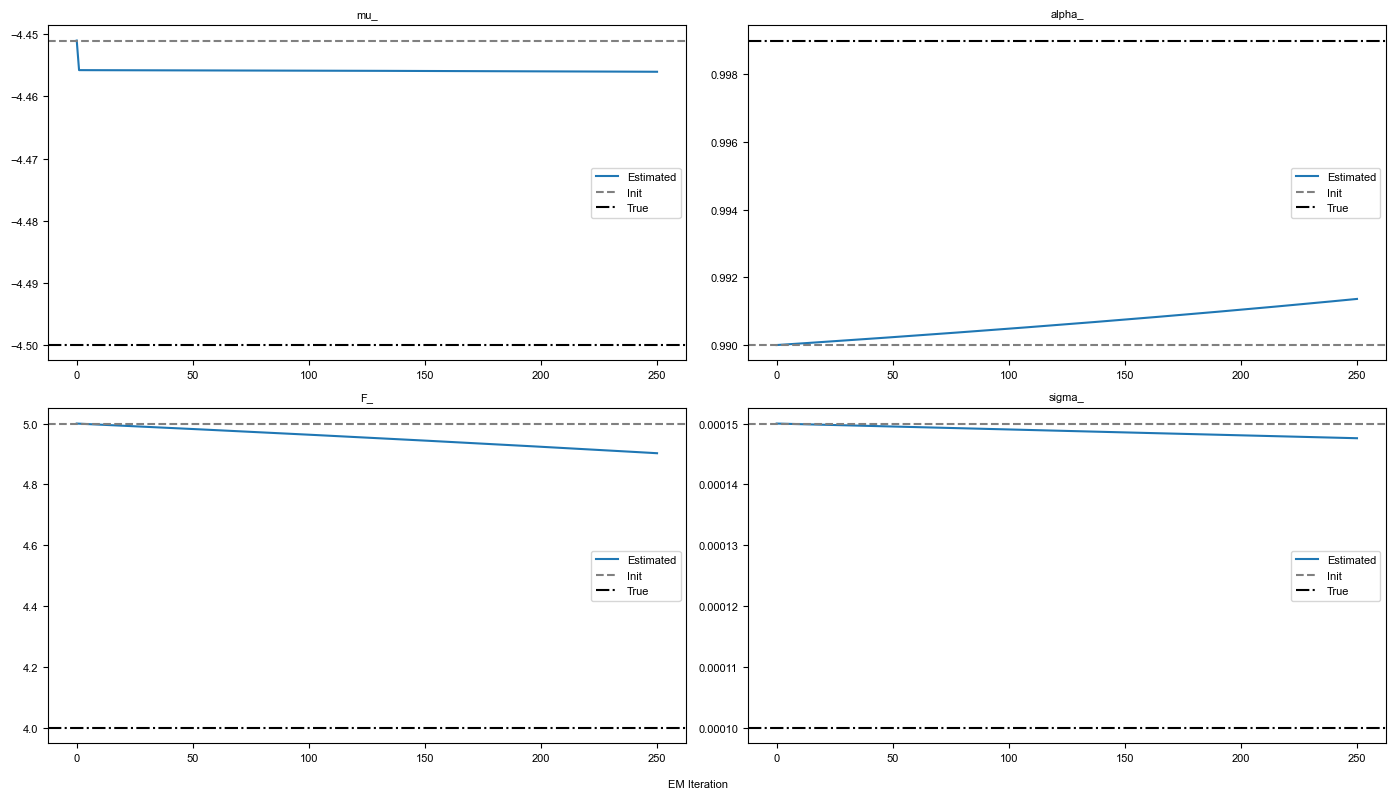

In [99]:
model.plot_param_history(true_params = [mu, alpha, F, sigma])

In [27]:
scores = model.plot_score_history(y, ret=True)

IndexError: index 250 is out of bounds for axis 0 with size 250

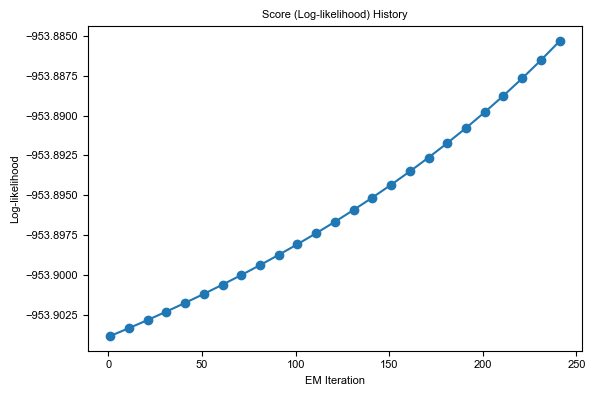

In [91]:
score = []
iterations = list(range(1, len(model._x_p_history)+1, 10))

for itr in iterations:
    mu_itr = model._param_history.loc[itr, 'mu_']
    alpha_itr = model._param_history.loc[itr, 'alpha_']
    F_itr = model._param_history.loc[itr, 'F_']
    omega_itr = model._param_history.loc[itr, 'omega_']
    sigma_itr = model._param_history.loc[itr, 'sigma_']
    
    xp_itr = model._x_p_history[itr-1]
    Pp_itr = model._P_p_history[itr-1]

    score_val = model._log_likelihood(y, mu_itr, xp_itr, Pp_itr, beta, order=3)
    score.append(score_val)

plt.figure(figsize=(6, 4))
plt.plot(iterations, score, marker='o')
plt.xlabel("EM Iteration")
plt.ylabel("Log-likelihood")
plt.title("Score (Log-likelihood) History")
plt.tight_layout()
plt.show()

# Final figs

In [75]:
import matplotlib as mpl
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['figure.figsize'] = (10, 4)
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams['ytick.labelsize'] = 14
# mpl.rcParams['axes.linewidth'] = 2
# mpl.rcParams['font.size'] = 14
# mpl.rcParams['ytick.major.width'] = 1.5
# mpl.rcParams['xtick.major.width'] = 1.5
# mpl.rcParams['ytick.major.size'] = 8
# mpl.rcParams['xtick.major.size'] = 8

FONT = 'Arial'
FONT_SIZE = 8
RC = {
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.transparent': True,
    # Font
    'font.family': 'sans-serif',
    'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'figure.labelsize': FONT_SIZE,
    'figure.titlesize': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'legend.fontsize': FONT_SIZE,
}
mpl.rcParams.update(RC)

In [32]:
obs = np.exp(mu + beta*X[0])

In [33]:
Fs, N/Fs, n

(1000, 15.0, 6)

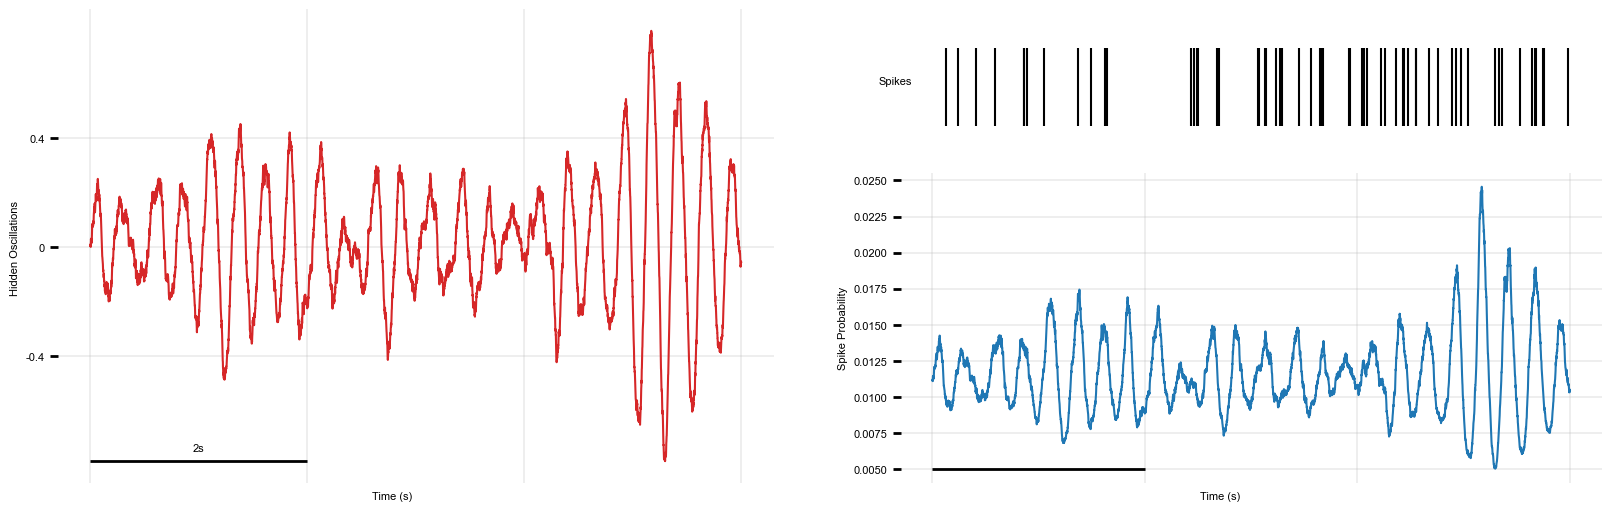

In [78]:
fig = plt.figure(layout='constrained', figsize=(16,5))
subfigs = fig.subfigures(1, 2, hspace=0.07, wspace=0.07)
leftax = subfigs[0].subplots()
(rtop, rbot) = subfigs[1].subplots(2,1, gridspec_kw={'height_ratios': [1, 2]}, sharex = True)

n = 6

leftax.plot(X[0][:n*Fs], label='$x_1$', c='C3')
for spine in leftax.spines.values():
    spine.set_visible(False)
leftax.grid(True, linewidth=0.3)
leftax.hlines(y=X[0].min(), xmin=0, xmax=2*Fs, color='black', linewidth=2)
leftax.text(1*Fs, X[0].min() + 0.03, "2s",
        ha='center', va='bottom', )
leftax.set_ylabel('Hidden Oscillations ', )
leftax.set_xticks([i*Fs for i in range(0, 7, 2)], [])
leftax.set_yticks([-0.4, 0, 0.4], [-0.4, 0, 0.4], )
# leftax.tick_params(which='major', width=2, length = 6)
leftax.tick_params(axis = 'y', which='major', width=2, length = 6)
leftax.tick_params(axis = 'x', which='major', width=2, length = 0)

rtop.vlines(np.where(y[:n*Fs]), ymin = 0, ymax = 1, color='k')
rtop.set_ylim([-0.5, 1.5])
for spine in rtop.spines.values():
    spine.set_visible(False)
rtop.set_xticks([], [])
rtop.tick_params(which='major', width=2, length = 0)
rtop.set_yticks([], [], )
rtop.set_ylabel('Spikes', rotation=0, )

rbot.plot(obs[:n*Fs])
rbot.grid(True, linewidth=0.3)
for spine in rbot.spines.values():
    spine.set_visible(False)
rbot.hlines(y=obs.min(), xmin=0, xmax=2*Fs, color='black', linewidth=2)
rbot.set_xticks([i*Fs for i in range(0, 7, 2)], [])
rbot.set_ylabel('Spike Probability')
# rbot.set_yticks([0.008, 0.012, 0.016], [0.008, 0.012, 0.016], ) #Fix
rbot.tick_params(axis = 'y', which='major', width=2, length = 6)
rbot.tick_params(axis = 'x', which='major', width=2, length = 0)

subfigs[0].supxlabel('Time (s)')
subfigs[1].supxlabel('Time (s)')
plt.show()

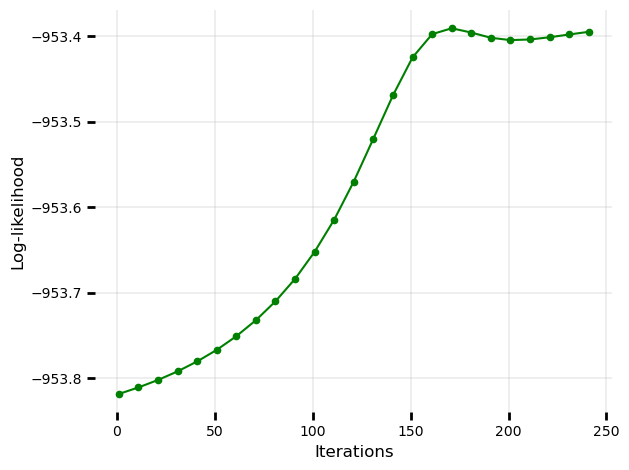

In [53]:
fig, ax = plt.subplots()
ax.plot(range(1, model.max_iter+1, 10), score, 'g.-', ms = 9)
ax.set_xlabel('Iterations', fontsize = 12)
ax.set_ylabel('Log-likelihood', fontsize=12)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(True, linewidth=0.3)
ax.set_xticks([i for i in range(0, model.max_iter+1, 50)], [i for i in range(0, model.max_iter+1, 50)])
# ax.set_yticks([-1831.95, -1831.875, -1831.8], [-1831.95, -1831.875, -1831.8], fontsize=14)
ax.tick_params(which='major', width=2, length = 6)
fig.tight_layout()
plt.show()

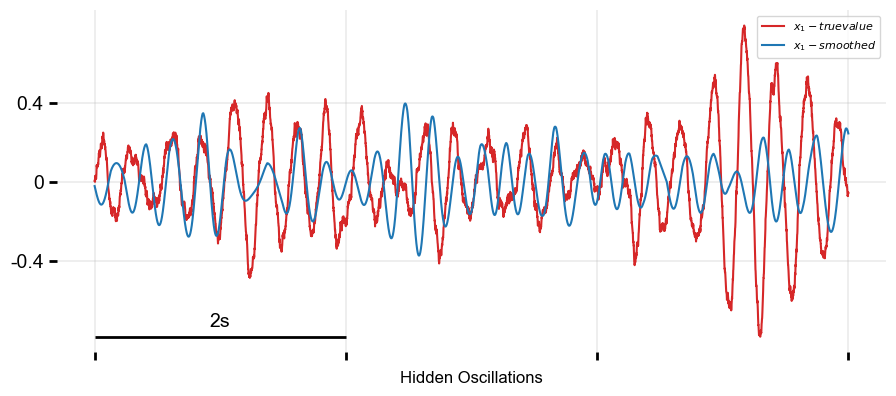

In [79]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(X[0][:n*Fs], label='$x_1 - true value$', c='C3')
ax.plot(model._x_b_history[-1][0][:n*Fs], label='$x_1-smoothed$', c='C0')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(True, linewidth=0.3)
ax.hlines(y=X[0].min(), xmin=0, xmax=2*Fs, color='black', linewidth=2)
ax.text(1*Fs, X[0].min() + 0.03, "2s",
        ha='center', va='bottom', fontsize=14)
ax.set_xlabel('Hidden Oscillations', fontsize=12)
ax.set_xticks([i*Fs for i in range(0, 7, 2)], [])
ax.set_yticks([-0.4, 0, 0.4], [-0.4, 0, 0.4], fontsize=14)
ax.tick_params(which='major', width=2, length = 6)
ax.legend()
fig.tight_layout()
plt.show()

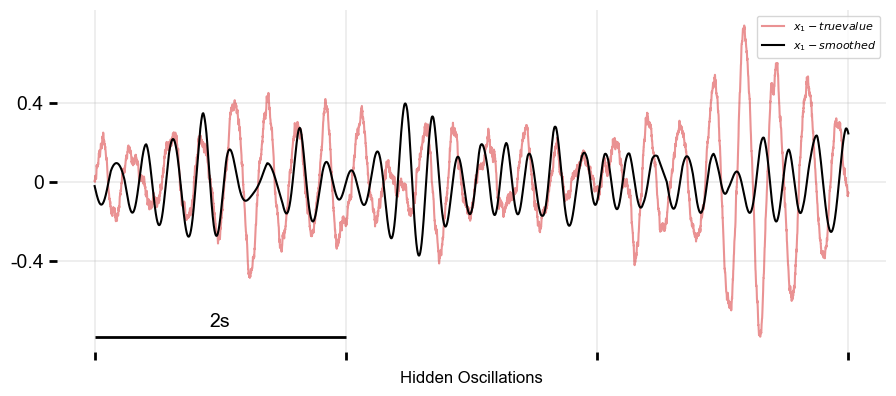

In [82]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(X[0][:n*Fs], label='$x_1 - true value$', c='C3', alpha= 0.5)
ax.plot(model._x_b_history[-1][0][:n*Fs], label='$x_1-smoothed$', c='k', lw = 1.5)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(True, linewidth=0.3)
ax.hlines(y=X[0].min(), xmin=0, xmax=2*Fs, color='black', linewidth=2)
ax.text(1*Fs, X[0].min() + 0.03, "2s",
        ha='center', va='bottom', fontsize=14)
ax.set_xlabel('Hidden Oscillations', fontsize=12)
ax.set_xticks([i*Fs for i in range(0, 7, 2)], [])
ax.set_yticks([-0.4, 0, 0.4], [-0.4, 0, 0.4], fontsize=14)
ax.tick_params(which='major', width=2, length = 6)
ax.legend()
fig.tight_layout()
plt.show()

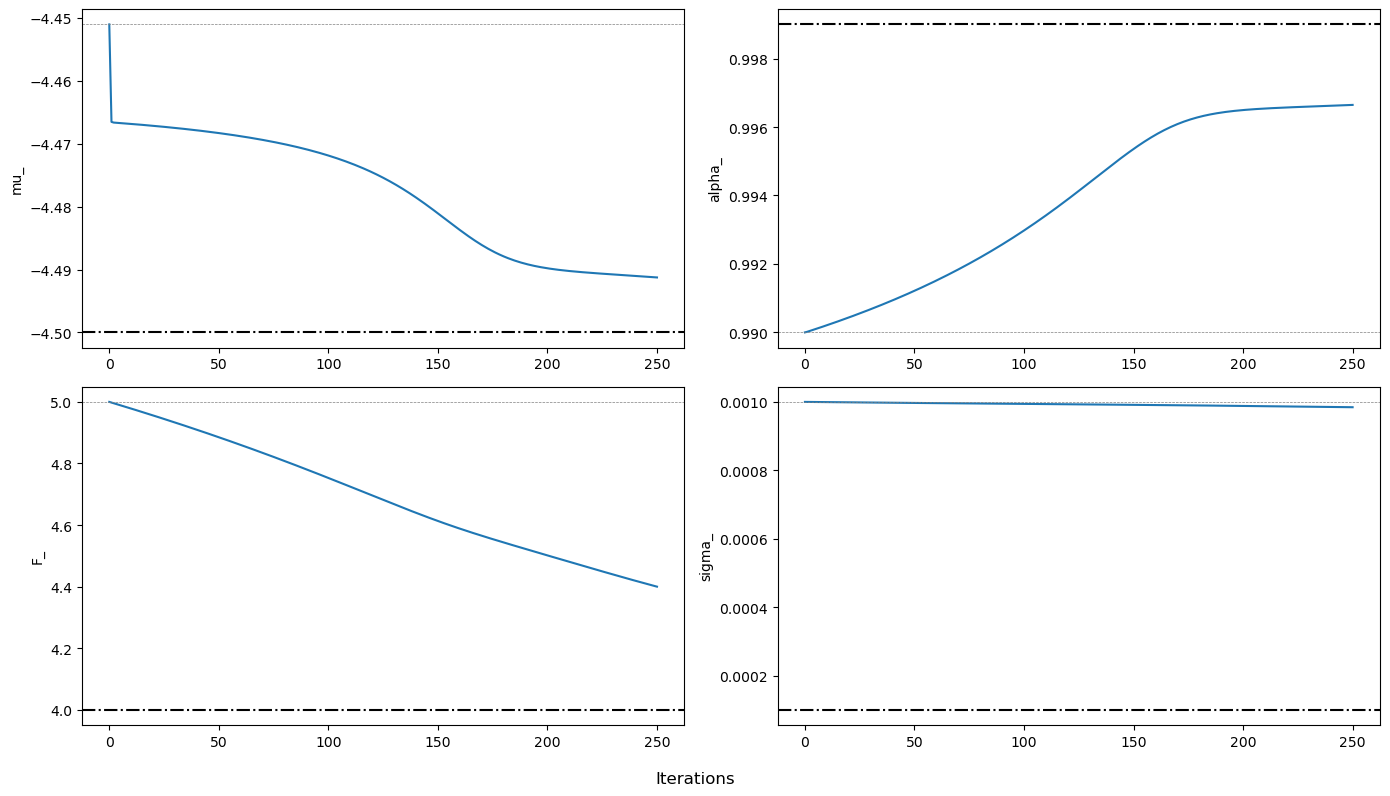

In [65]:
fig,axs = plt.subplots(2,2, figsize=(14,8))
true_params = [mu, alpha, F, sigma]
init_params = [mu0, alpha0, F0, sigma0]
for cols, ax, true_param, ix in zip(['mu_', 'alpha_', 'F_', 'sigma_'], axs.ravel(), true_params, np.arange(4)):
    ax.plot(model._param_history.loc[:, cols], label='calculated value')
    ax.axhline(init_params[ix], c='grey', ls='--', lw=0.5, label='initial value')
    ax.axhline(true_param, c='k', ls='-.', label='true value')
    ax.set_ylabel(cols)
    # ax.set_xlim([75, 90])
ax.legend()
fig.supxlabel('Iterations')
fig.tight_layout()
plt.show()


- mu : resting spike rate
- alpha : damping factor
- F : frequency
- sigma : process noise variance

In [ ]:
fig = plt.figure(layout='constrained', figsize=(16,10))
subfigs = fig.subfigures(1, 2, hspace=0.07, wspace=0.07)
(l1, l2, l3) = subfigs[0].subplots(3,1, sharex=True)
raxs = subfigs[1].subplots(5,1)

n = 6

l1.vlines(np.where(y[:n*Fs]), ymin = 0, ymax = 1, color='k')
l1.set_ylim([-0.5, 1.5])
for spine in l1.spines.values():
    spine.set_visible(False)
l1.set_xticks([], [])
l1.tick_params(which='major', width=2, length = 0)
l1.set_yticks([], [], )
l1.set_ylabel('Spikes', rotation=0, )

rbot.plot(obs[:n*Fs])
rbot.grid(True, linewidth=0.3)
for spine in rbot.spines.values():
    spine.set_visible(False)
rbot.hlines(y=obs.min(), xmin=0, xmax=2*Fs, color='black', linewidth=2)
rbot.set_xticks([i*Fs for i in range(0, 7, 2)], [])
rbot.set_ylabel('Spike Probability')
# rbot.set_yticks([0.008, 0.012, 0.016], [0.008, 0.012, 0.016], ) #Fix
rbot.tick_params(axis = 'y', which='major', width=2, length = 6)
rbot.tick_params(axis = 'x', which='major', width=2, length = 0)

subfigs[0].supxlabel('Time (s)')
subfigs[1].supxlabel('Time (s)')
plt.show()

# Big run

In [9]:
# params = pd.read_csv('params_big.csv', index_col=0)

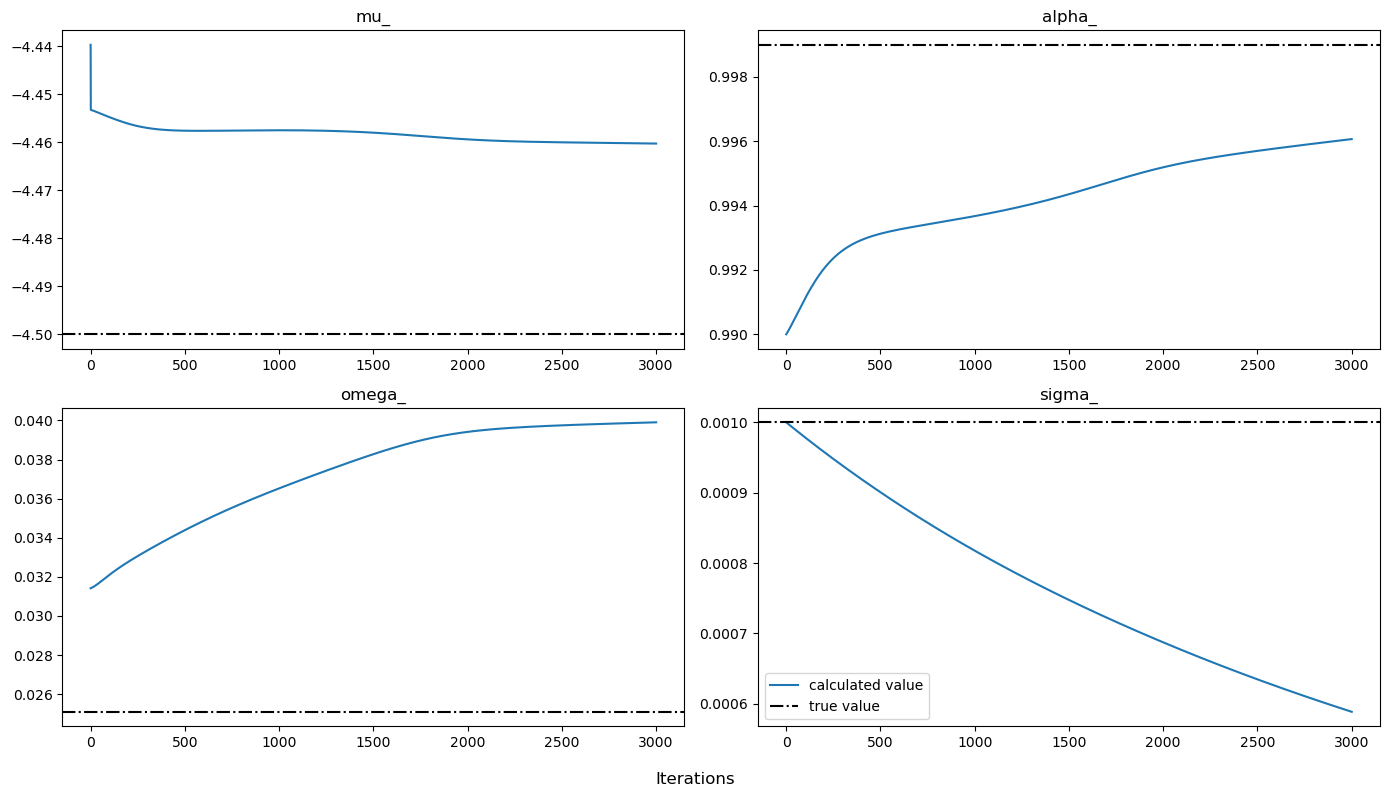

In [11]:
# fig,axs = plt.subplots(2,2, figsize=(14,8))
# true_params = [-4.5, 0.999, 0.0251, 0.001]
# # init_params = [mu0, alpha0, 2*np.pi*F0/Fs, sigma0]
# for cols, ax, true_param, ix in zip(['mu_', 'alpha_', 'omega_', 'sigma_'], axs.ravel(), true_params, np.arange(4)):
#     ax.plot(params.loc[:, cols], label='calculated value')
#     # ax.axhline(init_params[ix], c='grey', ls='--', lw=0.5, label='initial value')
#     ax.axhline(true_param, c='k', ls='-.', label='true value')
#     ax.set_title(cols)
#     # ax.set_xlim([75, 90])
# ax.legend()
# fig.supxlabel('Iterations')
# fig.tight_layout()
# plt.show()
# # 